[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-1/chain.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58238466-lesson-4-chain)

# Chain

## Review

We built a simple graph with nodes, normal edges, and conditional edges.

## Goals

Now, let's build up to a simple chain that combines 4 [concepts](https://python.langchain.com/v0.2/docs/concepts/):

* Using [chat messages](https://python.langchain.com/v0.2/docs/concepts/#messages) as our graph state
* Using [chat models](https://python.langchain.com/v0.2/docs/concepts/#chat-models) in graph nodes
* [Binding tools](https://python.langchain.com/v0.2/docs/concepts/#tools) to our chat model
* [Executing tool calls](https://python.langchain.com/v0.2/docs/concepts/#functiontool-calling) in graph nodes 

![Screenshot 2024-08-21 at 9.24.03 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dd607b08df5e1101_chain1.png)

In [1]:
# %%capture --no-stderr
# %pip install --quiet -U langchain_openai langchain_core langgraph

## Messages

Chat models can use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages), which capture different roles within a conversation. 

LangChain supports various message types, including `HumanMessage`, `AIMessage`, `SystemMessage`, and `ToolMessage`. 

These represent a message from the user, from chat model, for the chat model to instruct behavior, and from a tool call. 

Let's create a list of messages. 

Each message can be supplied with a few things:

* `content` - content of the message
* `name` - optionally, a message author 
* `response_metadata` - optionally, a dict of metadata (e.g., often populated by model provider for `AIMessages`)

In [2]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.", name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about?", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about?
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


## Chat Models

[Chat models](https://python.langchain.com/v0.2/docs/concepts/#chat-models) can use a sequence of message as input and support message types, as discussed above.

There are [many](https://python.langchain.com/v0.2/docs/concepts/#chat-models) to choose from! Let's work with OpenAI. 

Let's check that your `OPENAI_API_KEY` is set and, if not, you will be asked to enter it.

In [3]:
# import os, getpass

# def _set_env(var: str):
#     if not os.environ.get(var):
#         os.environ[var] = getpass.getpass(f"{var}: ")

# _set_env("OPENAI_API_KEY")

We can load a chat model and invoke it with out list of messages.

We can see that the result is an `AIMessage` with specific `response_metadata`.

In [4]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_ollama import ChatOllama


_ = load_dotenv(dotenv_path="./studio/.env")

if False:
    # OpenAI model
    llm = ChatOpenAI(
        model="gpt-4o",
        api_key=os.getenv("OPENAI_API_KEY"))
else:
    # Llama model from Ollama
    llm = ChatOllama(
        model="llama3.2:1b",
        temperature=0.001
    )

result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [5]:
result

AIMessage(content="Orcas, also known as killer whales, are a popular sight among whale watching enthusiasts. In the United States, there are several locations where you can spot them in their natural habitat.\n\nHere are some of the top places to see orcas in the US:\n\n1. **Puget Sound, Washington**: This is one of the best places in the US to see orcas, particularly in the Puget Sound region around Seattle and Tacoma.\n2. **San Juan Islands, Washington**: The San Juan Islands are a popular spot for orca sightings, especially during the summer months when they congregate in the waters around the islands.\n3. **Alaska's Inside Passage**: Alaska is home to a large population of orcas, and the Inside Passage is a great place to see them. You can take a guided tour or go on your own with a boat tour operator.\n4. **California's Monterey Bay**: The Monterey Bay National Marine Sanctuary is a protected area where you can spot orcas in their natural habitat.\n5. **Hawaii's Humpback Whale Sea

gpt-4o answer:<br>

```python
AIMessage(
    content="The best place to see orcas (also known as killer whales) in the United States is typically considered to be the Pacific Northwest, particularly the waters around Washington State. Here are a few specific locations that are well-known for orca sightings:\n\n1. **San Juan Islands, Washington**: This is one of the most famous spots for whale watching in the U.S. The islands are located in the Salish Sea, and the area is home to both resident and transient orca pods. You can take a whale-watching tour from Friday Harbor or other nearby locations.\n\n2. **Puget Sound, Washington**: Orcas can also be seen in the broader Puget Sound area. There are several whale-watching tours operating from cities like Seattle and Port Townsend.\n\n3. **Olympic Coast, Washington**: The Olympic National Park area offers opportunities to view orcas from the shore or by boat. The Strait of Juan de Fuca, which separates Washington State from Vancouver Island, is another good spot.\n\n4. **Bellingham and Anacortes, Washington**: These towns are gateways to the San Juan Islands and offer numerous whale-watching tours.\n\nThe best time to see orcas in these areas is typically from late spring through early fall, though they can be spotted year-round. It's always a good idea to check with local tour operators for the most current information on whale sightings.",
    additional_kwargs={"refusal": None},
    response_metadata={
        "token_usage": {
            "completion_tokens": 282,
            "prompt_tokens": 67,
            "total_tokens": 349,
            "completion_tokens_details": {
                "accepted_prediction_tokens": 0,
                "audio_tokens": 0,
                "reasoning_tokens": 0,
                "rejected_prediction_tokens": 0,
            },
            "prompt_tokens_details": {"audio_tokens": 0, "cached_tokens": 0},
        },
        "model_name": "gpt-4o-2024-08-06",
        "system_fingerprint": "fp_831e067d82",
        "finish_reason": "stop",
        "logprobs": None,
    },
    id="run-f8a03a78-edb9-44ac-a917-61bc3c2979c0-0",
    usage_metadata={
        "input_tokens": 67,
        "output_tokens": 282,
        "total_tokens": 349,
        "input_token_details": {"audio": 0, "cache_read": 0},
        "output_token_details": {"audio": 0, "reasoning": 0},
    },
)
```

<br>llama3.2:1b (local) answer:
```python
AIMessage(
    content="Orcas, also known as killer whales, are found throughout the world's oceans, but some areas are particularly known for their high concentration of these magnificent creatures.\n\nIn the United States, there are several locations that are considered prime spots to see orcas. Here are a few recommendations:\n\n1. **Alaska**: Alaska is one of the best places in the US to spot orcas, particularly in the Inside Passage and around Prince William Sound. The state's diverse marine ecosystem supports a healthy population of orcas.\n2. **Hawaii**: Humpback whales migrate to Hawaii's waters from December to May, and orcas are also present in Hawaiian waters during this time. You can take a guided tour or visit popular spots like Molokini Crater and Kailua-Kona.\n3. **California**: The Pacific Ocean off the coast of California is home to orca pods that feed on fish and squid. Some popular locations include Monterey Bay, Big Sur, and Santa Barbara.\n4. **Oregon**: Oregon's coastal waters are a great place to spot orcas, particularly around Cannon Beach and Ecola State Park.\n\nSome specific parks and wildlife refuges in these areas offer guided tours or boat excursions that can increase your chances of spotting orcas:\n\n* Alaska: Katmai National Park and Preserve, Kenai Fjords National Park\n* Hawaii: Humpback Whale National Marine Sanctuary, Maui, Molokini Crater\n* California: Monterey Bay Aquarium, Santa Cruz Harbor\n* Oregon: Cannon Beach, Ecola State Park\n\nKeep in mind that orca sightings can never be guaranteed, as they are wild animals and their habitats are constantly changing. However, visiting these locations during peak orca migration times (e.g., winter months) increases your chances of spotting them.\n\nWhat type of experience are you looking for when it comes to seeing orcas? Are you interested in guided tours, boat excursions, or just learning more about these magnificent creatures?",
    additional_kwargs={},
    response_metadata={
        "model": "llama3.2:1b",
        "created_at": "2024-11-29T15:53:59.826737768Z",
        "done": True,
        "done_reason": "stop",
        "total_duration": 3028689556,
        "load_duration": 15750825,
        "prompt_eval_count": 81,
        "prompt_eval_duration": 11000000,
        "eval_count": 400,
        "eval_duration": 3000000000,
        "message": Message(role="assistant", content="", images=None, tool_calls=None),
    },
    id="run-3051e3ac-0e10-41e3-ad3b-3dc87525ff21-0",
        usage_metadata={
        "input_tokens": 81,
        "output_tokens": 400,
        "total_tokens": 481
    },
)
```

[llama 3.2:1b] result.response_metadata:<br>
```js
{'model': 'llama3.2:1b',
 'created_at': '2024-11-29T16:00:29.107766376Z',
 'done': True,
 'done_reason': 'stop',
 'total_duration': 3246664592,
 'load_duration': 15115879,
 'prompt_eval_count': 81,
 'prompt_eval_duration': 10000000,
 'eval_count': 362,
 'eval_duration': 2752000000,
 'message': Message(role='assistant', content='', images=None, tool_calls=None)}
 ```

In [6]:
result.response_metadata  # gpt-4o

{'model': 'llama3.2:1b',
 'created_at': '2025-01-02T17:54:18.813396695Z',
 'done': True,
 'done_reason': 'stop',
 'total_duration': 5772998257,
 'load_duration': 2155855400,
 'prompt_eval_count': 81,
 'prompt_eval_duration': 232000000,
 'eval_count': 373,
 'eval_duration': 2862000000,
 'message': Message(role='assistant', content='', images=None, tool_calls=None)}

## Tools

Tools are useful whenever you want a model to interact with external systems.

External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language. 

When we bind an API, for example, as a tool we given the model awareness of the required input schema.

The model will choose to call a tool based upon the natural language input from the user. 

And, it will return an output that adheres to the tool's schema. 

[Many LLM providers support tool calling](https://python.langchain.com/v0.1/docs/integrations/chat/) and [tool calling interface](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/) in LangChain is simple. 
 
You can simply pass any Python `function` into `ChatModel.bind_tools(function)`.

![Screenshot 2024-08-19 at 7.46.28 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dc1c17a7a57f9960_chain2.png)

Let's showcase a simple example of tool calling!
 
The `multiply` function is our tool.

In [7]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

If we pass an input - e.g., `"What is 2 multiplied by 3"` - we see a tool call returned. 

The tool call has specific arguments that match the input schema of our function along with the name of the function to call.

```
{'arguments': '{"a":2,"b":3}', 'name': 'multiply'}
```

In [8]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Lance")])
tool_call

AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-01-02T17:54:19.154373673Z', 'done': True, 'done_reason': 'stop', 'total_duration': 213717361, 'load_duration': 13537270, 'prompt_eval_count': 172, 'prompt_eval_duration': 2000000, 'eval_count': 26, 'eval_duration': 197000000, 'message': Message(role='assistant', content='', images=None, tool_calls=[ToolCall(function=Function(name='multiply', arguments={'a': '2', 'b': '3'}))])}, id='run-8eac90bd-5da8-4b8e-9b07-c5e5195d0af4-0', tool_calls=[{'name': 'multiply', 'args': {'a': '2', 'b': '3'}, 'id': '6b4e6734-eb50-4f85-9716-570d710b964c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 172, 'output_tokens': 26, 'total_tokens': 198})

gpt-4o `tool_call`: <br>

```python
AIMessage(
    content="",
    additional_kwargs={
        "tool_calls": [
            {
                "id": "call_SMEH2M5fgqSqYKmTHMhPRj27",
                "function": {"arguments": '{"a":2,"b":3}', "name": "multiply"},
                "type": "function",
            }
        ],
        "refusal": None,
    },
    response_metadata={
        "token_usage": {
            "completion_tokens": 17,
            "prompt_tokens": 62,
            "total_tokens": 79,
            "completion_tokens_details": {
                "accepted_prediction_tokens": 0,
                "audio_tokens": 0,
                "reasoning_tokens": 0,
                "rejected_prediction_tokens": 0,
            },
            "prompt_tokens_details": {"audio_tokens": 0, "cached_tokens": 0},
        },
        "model_name": "gpt-4o-2024-08-06",
        "system_fingerprint": "fp_7f6be3efb0",
        "finish_reason": "tool_calls",
        "logprobs": None,
    },
    id="run-0e49cdb7-2e36-477b-b00f-8025ad9a6815-0",
    tool_calls=[
        {
            "name": "multiply",
            "args": {"a": 2, "b": 3},
            "id": "call_SMEH2M5fgqSqYKmTHMhPRj27",
            "type": "tool_call",
        }
    ],
    usage_metadata={
        "input_tokens": 62,
        "output_tokens": 17,
        "total_tokens": 79,
        "input_token_details": {"audio": 0, "cache_read": 0},
        "output_token_details": {"audio": 0, "reasoning": 0},
    },
)
```

llama3.2:1b `tool_call`: <br>
```python
AIMessage(
    content="",
    additional_kwargs={},
    response_metadata={
        "model": "llama3.2: 1b",
        "created_at": "2024-11-29T16: 00: 46.029793285Z",
        "done": True,
        "done_reason": "stop",
        "total_duration": 193722327,
        "load_duration": 17424024,
        "prompt_eval_count": 172,
        "prompt_eval_duration": 4000000,
        "eval_count": 22,
        "eval_duration": 171000000,
        "message": Message(
            role="assistant",
            content="",
            images=None,
            tool_calls=[
                ToolCall(
                    function=Function(name="multiply", arguments={"a": "2", "b": "3"})
                )
            ],
        ),
    },
    id="run-76affdd3-75f2-4a0c-a745-da6a45d42fdc-0",
    tool_calls=[
        {
            "name": "multiply",
            "args": {"a": "2", "b": "3"},
            "id": "6461cdef-3a78-431e-9058-8979f41ec119",
            "type": "tool_call",
        }
    ],
    usage_metadata={"input_tokens": 172, "output_tokens": 22, "total_tokens": 194},
)
```

In [9]:
# tool_call.additional_kwargs['tool_calls']
tool_call.tool_calls

[{'name': 'multiply',
  'args': {'a': '2', 'b': '3'},
  'id': '6b4e6734-eb50-4f85-9716-570d710b964c',
  'type': 'tool_call'}]

## Using messages as state

With these foundations in place, we can now use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages) in our graph state.

Let's define our state, `MessagesState`, as a `TypedDict` with a single key: `messages`.

`messages` is simply a list of messages, as we defined above (e.g., `HumanMessage`, etc).

In [10]:
from typing import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: list[AnyMessage]

## Reducers

Now, we have a minor problem! 

As we discussed, each node will return a new value for our state key `messages`.

But, this new value will [will override](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) the prior `messages` value.
 
As our graph runs, we want to **append** messages to to our `messages` state key.
 
We can use [reducer functions](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) address this.

Reducers allow us to specify how state updates are performed.

If no reducer function is specified, then it is assumed that updates to the key should *override it* as we saw before.
 
But, to append messages, we can use the pre-built `add_messages` reducer.

This ensures that any messages are appended to the existing list of messages.

We simply need to annotate our `messages` key with the `add_messages` reducer function as metadata.

In [11]:
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

Since having a list of messages in graph state is so common, LangGraph has a pre-built [`MessagesState`](https://langchain-ai.github.io/langgraph/concepts/low_level/#messagesstate)! 

`MessagesState` is defined: 

* With a pre-build single `messages` key
* This is a list of `AnyMessage` objects 
* It uses the `add_messages` reducer

We'll usually use `MessagesState` because it is less verbose than defining a custom `TypedDict`, as shown above.

In [12]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

To go a bit deeper, we can see how the `add_messages` reducer works in isolation.

In [13]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='49f9e3d3-9ade-4d30-aa7b-0152efc3a6a5'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='09cc2dd1-d921-4ed3-8361-4eb0ede1b4b2'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='b5dc9056-7f09-4d4a-9db6-a7e45cee85cc')]

## Our graph

Now, lets use `MessagesState` with a graph.

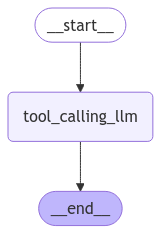

In [14]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
# Node
def tool_calling_llm(state: MessagesState):
    return {
        "messages": [
            llm_with_tools.invoke(state["messages"])
        ]
    }

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

If we pass in `Hello!`, the LLM responds without any tool calls.

In [15]:
messages = graph.invoke({"messages": HumanMessage(content="Hello! Don't keep calling the fucking tool, Llama! Stop it!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello! Don't keep calling the fucking tool, Llama! Stop it!
================================== Ai Message ==================================
Tool Calls:
  multiply (3474cbaf-d6f8-4b19-8f36-ad46383903a0)
 Call ID: 3474cbaf-d6f8-4b19-8f36-ad46383903a0
  Args:
    a: 10
    b: 5


The LLM chooses to use a tool when it determines that the input or task requires the functionality provided by that tool.

In [16]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 and 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (89266d1a-fa7a-4920-89f9-8ff5e5dc485a)
 Call ID: 89266d1a-fa7a-4920-89f9-8ff5e5dc485a
  Args:
    a: 2
    b: 3


***

# Mert's Sandbox

Result of `user_call.tool_calls`:
 [{'name': 'mult', 'args': {'a': 19, 'b': 10}, 'id': '3604781c-9460-4cf6-8e47-8be97c340c50', 'type': 'tool_call'}]


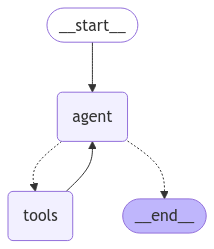

[-1:checkpoint] State at the end of step -1:
{'messages': []}
[0:tasks] Starting 1 task for step 0:
- __start__ -> {'messages': HumanMessage(content='What is the capital city of the UK?', additional_kwargs={}, response_metadata={})}
[0:writes] Finished step 0 with writes to 1 channel:
- messages -> HumanMessage(content='What is the capital city of the UK?', additional_kwargs={}, response_metadata={})
[0:checkpoint] State at the end of step 0:
{'messages': [HumanMessage(content='What is the capital city of the UK?', additional_kwargs={}, response_metadata={}, id='e8eb13f7-47b1-410b-85ed-02b69159d080')]}
[1:tasks] Starting 1 task for step 1:
- agent -> {'messages': [HumanMessage(content='What is the capital city of the UK?', additional_kwargs={}, response_metadata={}, id='e8eb13f7-47b1-410b-85ed-02b69159d080')]}
[1:writes] Finished step 1 with writes to 1 channel:
- messages -> [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-01-

In [2]:
import os
from dotenv import load_dotenv
from IPython.display import display, Image
from typing import TypedDict, Literal, Annotated
# langchain
from langchain_core.tools import tool
from langchain_ollama import ChatOllama
from langchain_openai import ChatOpenAI
from langchain_core.messages.base import BaseMessage
from langchain_core.messages import HumanMessage, AnyMessage, SystemMessage
# langgraph
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph import add_messages, MessagesState, StateGraph, END


# load env variables
load_dotenv(dotenv_path="./studio/.env");
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"

# message development
system_prompt = [
    SystemMessage(
        content=(
            "You are a helpful assistant talking in Spanish. "
            "If the query seeks the result of a mathematical operation, "
            "use the relevant tool. If it is not about math, "
            "answer as normal. If you do not know the answer, tell it to user "
            "and do not provide unnecessary answer. "
            "Remember: You have to answer in Spanish."
        )
    )
]

# agent development
llm = ChatOllama(model="llama3.2:1b", temperature=0.1)
# llm = ChatOpenAI(model="gpt-4o-mini")

# tool development
@tool
def mult(a: int, b: int) -> int:
    """Multiplies two numbers, a & b, and returns the result.
    
    Args:
        a: First number.
        b: Second number.
    """
    return a * b

tools = [mult]
tool_node = ToolNode(tools=tools)

# add tool to the llm
llm_with_tools = llm.bind_tools(tools=tools)

# sample user call
user_call = llm_with_tools.invoke(
    input=[
        HumanMessage(
            content="What is nineteen times ten?",
            name="Human"
        )
    ]
)
print ("Result of `user_call.tool_calls`:\n", user_call.tool_calls)
del user_call

# define a sample message schema (we'll use the imported class anyway).
class _MessageState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

# add nodes
def deciding_node(state: MessagesState) -> Literal["tools", END]:
    messages = state["messages"]
    last_msg = messages[-1]
    if last_msg.tool_calls:
        return "tools"
    else:
        return END

def llm_node(state: MessagesState) -> dict[str, list[BaseMessage]]:
    messages = state["messages"]
    llm_response = llm_with_tools.invoke(input=(system_prompt + messages))
    # Here, we should return a list. It'll be added to the messages.
    return {"messages": [llm_response]}

# build the graph
builder = StateGraph(state_schema=MessagesState)
builder.add_node(node="agent", action=llm_node)
builder.add_node(node="tools", action=tool_node)

builder.set_entry_point(key="agent")
builder.add_conditional_edges(source="agent", path=tools_condition)  # `deciding_node` is changed by a prebuilt fnc
### INFO: In the prebuilt `tools_condition` function, the name `"tools"` is
### predefined as well and it has to be "tools". Thus, node="tool" doesn't work.
### It gives: KeyError: 'branch:agent:tools_condition:tools'

builder.add_edge(start_key="tools", end_key="agent")
# builder.add_edge(start_key="agent", end_key=END)  # unnecessary due to the conditional edge

# add MemorySaver as a checkpoint
check_pt = MemorySaver()
graph = builder.compile(checkpointer=check_pt, debug=True)
display(Image(graph.get_graph().draw_mermaid_png()))

# prompting
prompt = "What is the capital city of the UK?"  # "What is nineteen times ten?"
prompt = HumanMessage(content=prompt)
agent_response = graph.invoke(
    input={
        "messages": prompt
    },
    config={
        "configurable": {
            "thread_id": 42
        }
    }
)

print("\n---RESPONSE---")
for m in agent_response["messages"]:
    m.pretty_print()